In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
import os


from fastai.vision import *

from split_train_valid_subdir import split_train_valid_subdir
from IPython.display import Image, display

In [2]:
'''
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# ResNet50
from tensorflow.python.keras.applications import ResNet50
from tensorflow.keras.applications import resnet50
'''

'\nfrom tensorflow.python.keras.models import Sequential\nfrom tensorflow.python.keras.layers import Dense\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.callbacks import EarlyStopping\n\n# ResNet50\nfrom tensorflow.python.keras.applications import ResNet50\nfrom tensorflow.keras.applications import resnet50\n'

# Explore and Prepare data

**First, let's show what are we talking about**

In [3]:
data_directory = 'downloads'

In [4]:
display(Image(url = 'https://media.giphy.com/media/lvClsfvqyb7S8/giphy.gif', width = 300, height = 300))
print('Windmill')

display(Image(url = 'https://i.pinimg.com/originals/75/5e/50/755e509a9ea32d4f2f194ba03d18ec10.gif', width = 300, height = 300))
print('Thomas')

display(Image(url = 'https://i.imgur.com/OzjZGMW.gif', width = 300, height = 300))
print('Air Flare')

Windmill


Thomas


Air Flare


In [5]:
labels = [v for v in os.listdir(data_directory) if '.' not in v ]
tot_obs = sum([len(os.listdir(data_directory+'/' + label))-1 for label in labels])
for label in [v for v in labels if '.' not in v ]:
    print(label,np.round((len(os.listdir(data_directory+'/' + label))-1)/tot_obs*100,2),'%','(',len(os.listdir(data_directory+'/' + label))-1,')')

thomas breakdance 13.07 % ( 23 )
air flare breakdance 44.89 % ( 79 )
windmill breakdance 41.48 % ( 73 )
models 0.57 % ( 1 )


There is little data (huge cleaning "by hand")

# ResNet50 fastAI

In [6]:
path = Path(data_directory)

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [8]:
data.classes

['air flare breakdance', 'thomas breakdance', 'windmill breakdance']

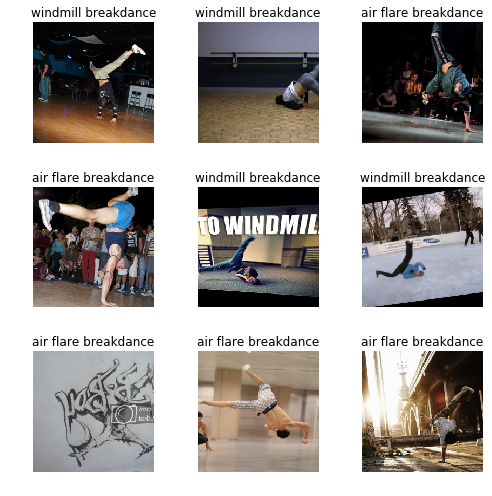

In [9]:
data.show_batch(rows=3, figsize=(7,7))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['air flare breakdance', 'thomas breakdance', 'windmill breakdance'],
 3,
 140,
 35)

In [11]:
# model
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.429772,0.846698,0.371429,02:06
1,1.132860,0.784421,0.400000,01:50
2,0.910155,0.693587,0.371429,01:51
3,0.741997,0.614863,0.285714,01:51


In [13]:
learn.save('stage-1')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

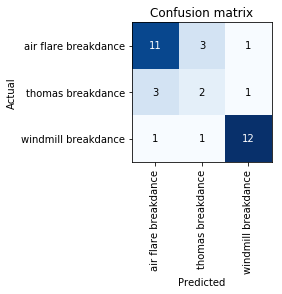

In [29]:
interp.plot_confusion_matrix()

# Production

In [30]:
# create export.pkl file with data and metadata
learn.export()

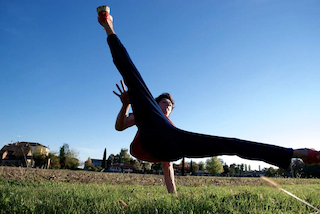

In [31]:
# test 
img = open_image('my_thomas.png')
img

In [32]:
learn = load_learner(path)

In [33]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category thomas breakdance